# Neural & Behavioral Modeling - Week 3 (Exercises)
by 李采蓉 b08207042@ntu.edu.tw

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Replicate exisiting findings/models (10 points)
Based on your personal interest, please choose and replicate ONE of the following studies:

1. <a href="http://ccl.northwestern.edu/netlogo/models/FlockingVeeFormations">Flocking Vee Formations</a> in NetLogo's [Sample Models::Biology] 

2. <a href="http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation">Wolf-Sheep Predation</a> in NetLogo's [Sample Models::Biology] 

3. <a href="https://kknews.cc/zh-tw/news/p56pbrp.html">MIT Matching Game</a>

4. Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). <a href="http://www.mpmlab.org/groups/">The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations</a>. Psychological Science, 25(4), 982-990.

5. Luhmann, C. C., & Rajaram, S. (2015). <a href="http://journals.sagepub.com/doi/abs/10.1177/0956797615605798">Memory transmission in small groups and large networks: An agent-based model</a>. Psychological Science, 26(12), 1909-1917.

6. Henriques, G. J., Simon, B., Ispolatov, Y., & Doebeli, M. (2019). <a href="https://www.pnas.org/content/116/28/14089">Acculturation drives the evolution of intergroup conflict</a>. Proceedings of the National Academy of Sciences, 116(28), 14089-14097.

### 【2022年搞笑諾貝爾經濟獎】不想努力的我，把運氣點滿就對了

In [2]:
# Model parameters:
Npeople=1000
Nevent=500
sz=201 # grid size

# Supporting functions:
class Person:
    def __init__(self, pos):
        self.deposit=[10]
        self.event=[0]
        self.coin=10 # initial energy
        self.color='dimgrey' # skin color
        while(1): # 防止重疊
            self.xy=random.randint(0,201,2)
            if(pos[self.xy[0]][self.xy[1]]==0): break
        self.talent=random.normal(loc=0.6, scale=0.1)
    def chance(self, eventcolor):
        if eventcolor=='green':
            lottery=random.uniform(0, 1)
            if lottery<=self.talent:
                self.coin*=2
        elif eventcolor=='red':
            self.coin=int(self.coin/2)
        
class Event:
    def __init__(self,num):
        if num<250:
            self.feature=1
        else:
            self.feature=2
        if self.feature==1:
            self.color='green' # lucky skin color
        else:
            self.color='red' # unlucky skin color
        self.xy=random.randint(0,201,2) # locations
        
    def move(self):
        previous=self.xy
        self.xy+=random.randint(-2,2,2) # move to its neighboring locations   
        self.xy=mod(self.xy,201) # cyclic boundary
        if self.color=='blue': self.pos.append(self.xy)
        
def plot_world(num, agents,events):
    sz=201
    clf() # clear previous figure
    spy(ones((sz, sz)), alpha=0.1, markersize=2.365, aspect='equal', origin='lower')
    for a in agents:
        text(a.xy[1]-.15,a.xy[0]-.15,'♀',{'size':3,'color':a.color})
    for e in events:
        text(e.xy[1]-.15,e.xy[0]-.15,'●',{'size':3,'color':e.color})
    axis('on')
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    #savefig("movie_w3/generation_"+str(num)+".png")

In [3]:
# Initialization:
grid=ones((sz,sz))
pos=[[0]*201 for i in range(201)]
events = [Event(i) for i in range(Nevent)] # assign each event to a location
people=[]
talent=[]
for i in range(Npeople): # assign each person to a location
    people.append(Person(pos))
    pos[people[i].xy[0]][people[i].xy[1]]=1
    talent.append(people[i].talent)

#### (1) 1000 人的才能分布圖

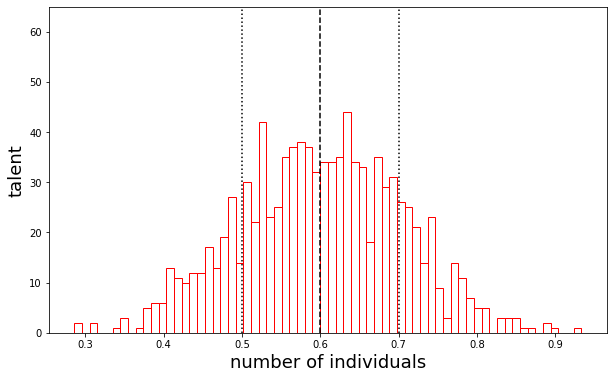

In [8]:
figure(figsize=(10, 6))
hist(talent, bins=66, facecolor='white', edgecolor='red')
xlabel("number of individuals", fontsize=18)
ylabel("talent", fontsize=18)
vlines(0.5, 0, 100, linestyle=':', color='black')
vlines(0.6, 0, 100, linestyle='--', color='black')
vlines(0.7, 0, 100, linestyle=':', color='black')
ylim(0, 65)
show()

#### (2) 40年模擬

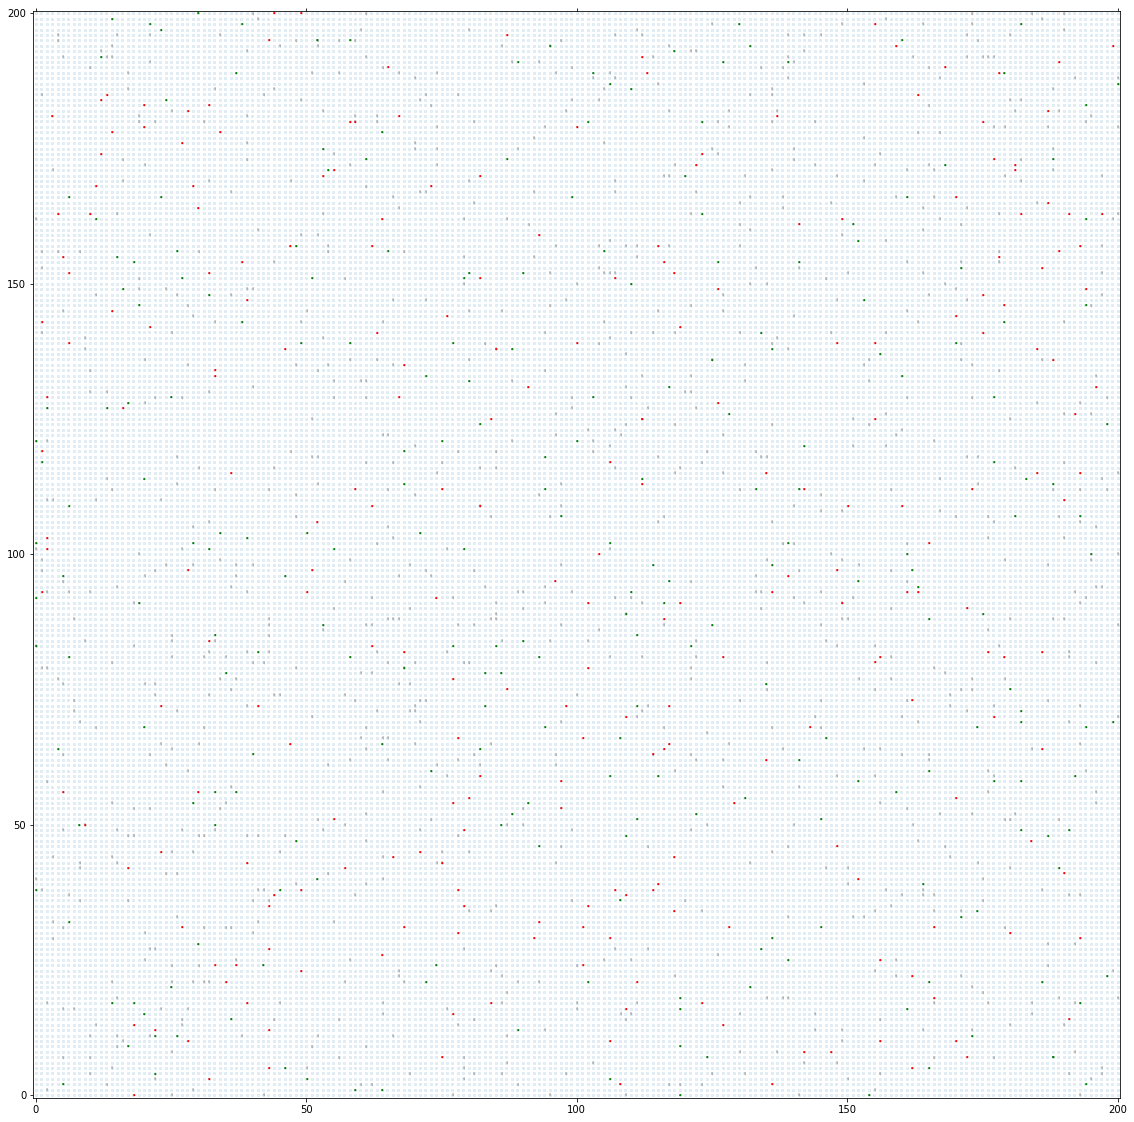

In [13]:
# Simulation:
gen=0
figure(figsize=(20, 20))
while(gen<80): # Simulation stops when everyone is dead
    for event in events:
        event.move()
        for agent in people:
            status=0
            if (event.xy==agent.xy).all() or (event.xy-[1, 0]==agent.xy).all() or (event.xy-[0, 1]==agent.xy).all() or (event.xy-[1, 1]==agent.xy).all() or (event.xy-[1, -1]==agent.xy).all()or (event.xy+[1, 0]==agent.xy).all() or (event.xy+[0, 1]==agent.xy).all() or (event.xy+[1, 1]==agent.xy).all() or (event.xy+[1, -1]==agent.xy).all():
                agent.chance(event.color)
                if event.color=='green':
                    status=1
                else:
                    status=-1
            agent.event.append(status)
            agent.deposit.append(agent.coin)
    plot_world(gen, people, events) # Plot new results
    gen+=1

#### (3) 財富分布狀況

In [18]:
MaxCoinAgent=0
MinCoinAgent=0
coin=[]
for i in range(1000):
    c=people[i].coin
    coin.append(c)
    if c>people[MaxCoinAgent].coin:
        MaxCoinAgent=i
    elif c<people[MinCoinAgent].coin:
        MinCoinAgent=i

In [17]:
from sklearn import linear_model

冪次律from: https://blog.csdn.net/qq_38785977/article/details/125578192

In [40]:
number=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
asset=[1, 100, 200, 300, 400, 500, 600, 700, 800, 900]
for c in coin:
    if c>=900:
        number[9]+=1
    if c>=800:
        number[8]+=1
    if c>=700:
        number[7]+=1
    if c>=600:
        number[6]+=1
    if c>=500:
        number[5]+=1
    if c>=400:
        number[4]+=1
    if c>=300:
        number[3]+=1
    if c>=200:
        number[2]+=1
    if c>=100:
        number[1]+=1
    number[0]+=1

Coefficients: [[-0.54181759]]
Intercept: [3.04544013]


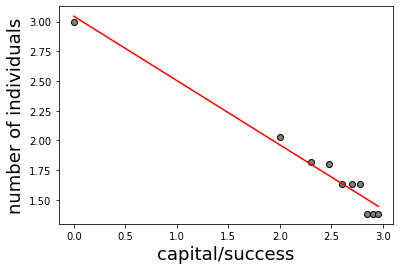

In [50]:
coinLog=log10(array(asset))
peoplenumLog=log10(array(number))

X_parameter=[]
Y_parameter=[]
for single_square_feet, single_price_value in zip(coinLog, peoplenumLog):
    X_parameter.append([float(single_square_feet)])
    Y_parameter.append([float(single_price_value)])
    
regr=linear_model.LinearRegression()
regr.fit(X_parameter, Y_parameter)
print('Coefficients:', regr.coef_,)
print("Intercept:", regr.intercept_)

scatter(X_parameter, Y_parameter, facecolor='grey', edgecolor='black')
plot(X_parameter, regr.predict(X_parameter), color='red')
xlabel("capital/success", fontsize=18)
ylabel("number of individuals", fontsize=18)
show()

#### (4) 1000 個代理人的才能（橫軸）以及最後的金額（縱軸）

In [19]:
print("第一名的財富:\t",people[MaxCoinAgent].coin ,"\t,能力值為:",people[MaxCoinAgent].talent)
print("最後一名的財富:\t",people[MinCoinAgent].coin ,"\t,能力值為:",people[MinCoinAgent].talent)

第一名的財富:	 32768 	,能力值為: 0.5538791855060382
最後一名的財富:	 0 	,能力值為: 0.6094041883512872


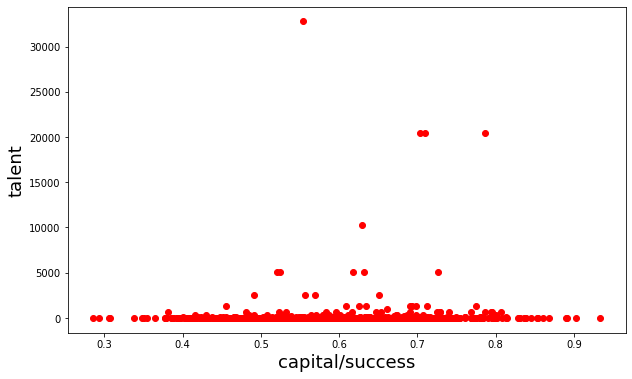

In [38]:
figure(figsize=(10, 6))
plot(talent, coin, 'ro')
xlabel("capital/success", fontsize=18)
ylabel("talent", fontsize=18)
show()

#### (5) 第一名的境遇

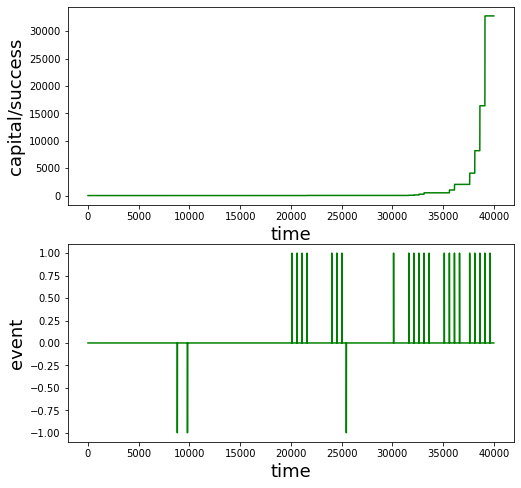

In [65]:
fig=figure(figsize=(8,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(people[MaxCoinAgent].deposit, 'g')
ax1.set_xlabel("time", fontsize=18)
ax1.set_ylabel("capital/success", fontsize=18)

ax2.plot(people[MaxCoinAgent].event, 'g')
ax2.set_xlabel("time", fontsize=18)
ax2.set_ylabel("event", fontsize=18)
show()

#### (6) 最後一名的境遇

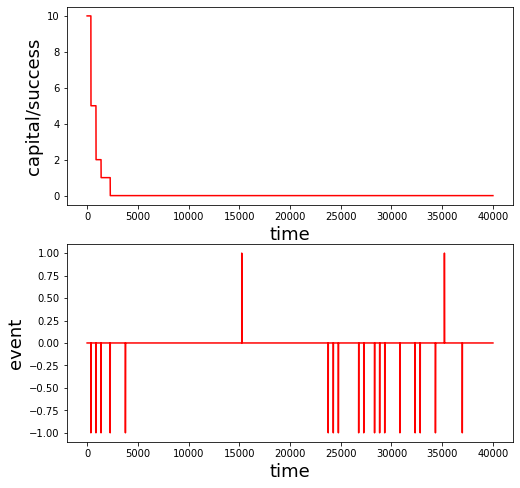

In [66]:
fig=figure(figsize=(8,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(people[MinCoinAgent].deposit, 'r')
ax1.set_xlabel("time", fontsize=18)
ax1.set_ylabel("capital/success", fontsize=18)

ax2.plot(people[MinCoinAgent].event, 'r')
ax2.set_xlabel("time", fontsize=18)
ax2.set_ylabel("event", fontsize=18)
show()